In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 
from scipy import optimize
import rigtigny as rn
import fredetry as fr

In [2]:
from types import SimpleNamespace
import scipy.optimize as optimize

class Ramseymodelclass:
    def __init__(self):
        par = self.par = SimpleNamespace()

        # parameters
        par.alpha = 0.33
        par.beta = 0.50
        par.delta = 0.05
        par.theta = 0.9

    @staticmethod
    def ss_equations(x, par):
        k, c, w, rk = x
        k_star = ((par.beta*par.alpha)/(1-par.beta))**(1/(1-par.alpha))
        c_star = k_star**par.alpha
        w_star = (1-par.alpha)*k_star**par.alpha
        rk_star = par.alpha*k_star**(par.alpha-1)
        equation1 = k_star - k
        equation2 = c_star - c
        equation3 = w_star - w
        equation4 = rk_star - rk
        return [equation1, equation2, equation3, equation4]
    
    def ss_values(self):
        par = self.par
        x0 = [1, 1, 1, 1] # initial guess for the steady state values needed for the algorithm to work
        ss_sol = optimize.root(Ramseymodelclass.ss_equations, x0, args=(par,), method='hybr')
        k_star, c_star, w_star, rk_star = ss_sol.x
        y_star = k_star**par.alpha
        pi_star = y_star - w_star - rk_star*k_star
        return k_star, c_star, w_star, rk_star, y_star, pi_star


In [3]:
ramsey_model = Ramseymodelclass()
k_star, c_star, w_star, rk_star, y_star, pi_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)
print("pi_star:", pi_star)

k_star: 0.191145504918385
c_star: 0.5792288027829848
w_star: 0.3880832978645998
rk_star: 0.9999999999999999
y_star: 0.5792288027829848
pi_star: 8.326672684688674e-17


In [4]:
ramsey_model = Ramseymodelclass()

# Modify the beta parameter
ramsey_model.par.beta = 0.05

k_star, c_star, w_star, rk_star, y_star, pi_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)
print("pi_star:", pi_star)


k_star: 0.0023592644585285045
c_star: 0.13583643852133814
w_star: 0.09101041380929654
rk_star: 18.999999999999993
y_star: 0.13583643852133814
pi_star: 2.7755575615628914e-17


In [7]:
ramsey_model = Ramseymodelclass()

# Modify the beta parameter
ramsey_model.par.alpha = 0.9

k_star, c_star, w_star, rk_star, y_star, pi_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)
print("pi_star:", pi_star)

k_star: 0.34867844010000004
c_star: 0.38742048900000003
w_star: 0.03874204889999999
rk_star: 1.0
y_star: 0.38742048900000003
pi_star: 0.0


In [8]:
ramsey_model = Ramseymodelclass()

# Modify the beta parameter
ramsey_model.par.alpha = 0.9
ramsey_model.par.beta = 0.05

k_star, c_star, w_star, rk_star, y_star, pi_star = ramsey_model.ss_values()

print("k_star:", k_star)
print("c_star:", c_star)
print("w_star:", w_star)
print("rk_star:", rk_star)
print("y_star:", y_star)
print("pi_star:", pi_star)

k_star: 5.687076686728783e-14
c_star: 1.2006050793088974e-12
w_star: 1.2011586552952368e-13
rk_star: 18.999999999999993
y_star: 1.200605078414328e-12
pi_star: -5.535759366407571e-17


# Assigment model project
Ramsey model: Finding the optimal growth for a cloaed, neo-classic economy. The agents in this economy are identical competetive firms and a large number of identical households. This model differentiates from the Solow model where it is assumed to be a fixed savings rate, by defining the savings behavior through the intertempotal utility function of the consumer.

# Defining the model:
Please note, that all lower case variables are in per capita terms

The profit function the firms maximize: 
$$\pi^F(K_t,L_t)=K^\alpha_tL^{1-\alpha}-w_tL_t-(\delta+r_tK_t)$$
$0<\alpha<1$

Where: 
bib bib bib 

SIMPLE FUNCTION FOR K_t+1 NO depreciation for now
$$ k_{t+1} = w_{t} + (1-r_{t})*k_{t} - c_{t]}$$

The intertemporal untility function of the consumer subject to their dynamic budget constraint:
$$U=\sum^\infty_{t=0}\beta^t\frac{c_t^{1-\theta}}{1-\theta} \quad \text{s.t.} \quad c_t + a_{t+1} = w_t+(1+r_t)a_t$$
Assumptions: $a_0>0$, $0<\beta<1$

Where
$c_t$ is the per-capita consumption\
$a_t$ is wealth\
bib bib bib
market clearing a = k

First we find how much capital and labor a firm demands at given factor prices by solving the firms maximization problem: 

$$\frac{\partial\pi^F(K_t,L_t)}{\partial L}=(1-\alpha)\left(\frac{K_t^\alpha}{L_t^\alpha}\right)-w_t=(1-\alpha)k^\alpha_t-w_t=0\Leftrightarrow $$ 
$$w_t=(1-\alpha)k^\alpha_t$$
The firm maximizes their labor, when the marginal products is equal to the wages, $w_t$. 
$$\frac{\partial\pi^F(K_t,L_t)}{\partial K}=\alpha\left(\frac{K_t^{\alpha-1}}{L_t^{\alpha-1}}\right)-r_t=\alpha k_t^{\alpha-1}-r_t=0\Leftrightarrow$$ 
$$ r_t=\alpha k_t^{\alpha-1}$$
The firm maximizes their capital, when the marginal products is equal to the price of capital, $r_t$. 

From the above we now know:\
The return the representative household receives on their saving:
$$r_tk_t=\alpha k^{\alpha-1+1}_t=\alpha k^\alpha_t$$
And the return the representative household receives in their labor service: 
$$w_tL_t=(1-\alpha)k^\alpha_tL_t$$


Using the Lagrainian we get the Euler equation, which if being followed makes the consumer indifferent between consuming one more unit today and saving the unit, thus consuming it in the future: 
$$\mathcal{L}(c_t,a_{t+1},\lambda)=\sum^\infty_{t=0}\beta^t[\frac{1}{1-\theta}c_t^{1-\theta}+\lambda_t(w_t+(1+r_t)a_t-c_t-a_{t+1})]$$
FOC w.r.t. $c_t$:
$$\frac{\partial \mathcal{L}}{\partial c_t}=\beta^t\frac{1-\theta}{1-\theta}c_t^{1-\theta-1}-\beta^t\lambda_t=0\Leftrightarrow \lambda_t = c^{-\theta}_t $$
FOC w.r.t. $a_{t+1}$:
$$\frac{\partial\mathcal{L}}{\partial a_{t+1}}=-\beta^t\lambda_t+\beta^{t+1}\lambda_{t+1}(1+r_{t+1})=0\Leftrightarrow \lambda_t = \beta(1+r_{t+1})\lambda_{t+1}$$


Combining the derivatives above give us the Euler equation: 
$$\frac{c_{t+1}}{c_t}=(\beta(1+r_{t+1}))^\frac{1}{\theta}$$
Which states that the marginal rate of substitution between the marginal utility of today and the future marginal utility is equal to the relative price of consumption. This insures equality between the future value of the discounted marginal utility of time $t+1$ and the marginal utility of time $t$. 


Maybe add something about what happens if $\beta$ or $r_t$ changes

# Steady state equations
Following equations (loci) are the steady state values of the economy found by the above equations:\
c-locus:
$$k^*=(\frac{\beta \alpha}{1-\beta})^\frac{1}{1-\alpha}$$
We notice, that the c-locus is independent of c, meaning graphically it will be a vertical line. 
k-locus:
$$c^*=k^\alpha$$
We see, that the k-locus won't depreciate after a certain point in time. It will grow continuously. 

In [5]:
print("This is the steady state capital: ", fr.ss)


This is the steady state capital:  (0.191145504918385, 0.5792288027829848)


Text(0.25, 1.3, 'c lokus')

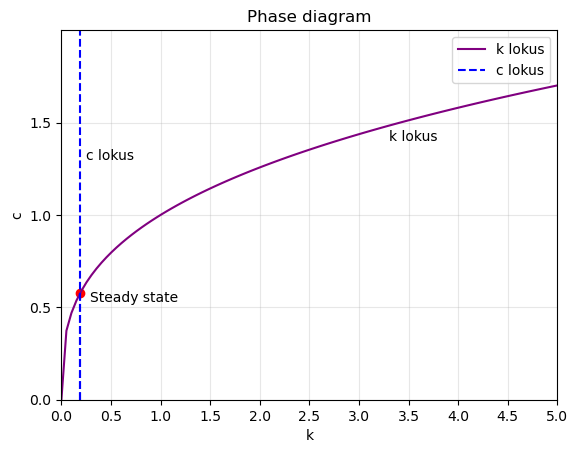

In [6]:
# Plot
k = np.linspace(0, 5, 100)
c = fr.c_lokus(fr.params["model1"]["alpha"], fr.params["model1"]["beta"])
fig, ax = plt.subplots()
ax.plot(k, fr.k_lokus(k, fr.params["model1"]["alpha"]), color="purple", label="k lokus")
ax.plot([c, c], [fr.k_lokus(0, fr.params["model1"]["alpha"]), fr.k_lokus(c, fr.params["model1"]["alpha"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ss[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ss[0], fr.ss[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 5])
ax.set_xticks(np.arange(0, 5.5, 0.5))
ax.set_ylim([0, 2.0])
ax.set_yticks(np.arange(0, 2.0, 0.5))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ss[0]+0.1, fr.ss[1]-0.05, "Steady state")
ax.text(3.3, 1.4, "k lokus")
ax.text(0.25, 1.3, "c lokus")


In [ ]:
# Plot
k = np.linspace(0, 5, 100)
c = fr.c_lokus(fr.params["model1"]["alpha"], fr.params["model1"]["beta"])
fig, ax = plt.subplots()
ax.plot(k, fr.k_lokus(k, fr.params["model1"]["alpha"]), color="purple", label="k lokus")
ax.plot([c, c], [fr.k_lokus(0, fr.params["model1"]["alpha"]), fr.k_lokus(c, fr.params["model1"]["alpha"])], "--", color="blue", label="c lokus")
ax.axvline(x=fr.ss[0], color="blue", linestyle="--", alpha=1)
ax.scatter(fr.ss[0], fr.ss[1], marker="o", color="red")
ax.set_xlabel("k")
ax.set_ylabel("c")
ax.set_title("Phase diagram")
ax.legend()

# Set axis limits and tick positions
ax.set_xlim([0, 5])
ax.set_xticks(np.arange(0, 5.5, 0.5))
ax.set_ylim([0, 2.0])
ax.set_yticks(np.arange(0, 2.0, 0.5))
ax.grid(alpha=0.3)

# Add text labels
ax.text(fr.ss[0]+0.1, fr.ss[1]-0.05, "Steady state")
ax.text(3.3, 1.4, "k lokus")
ax.text(0.25, 1.3, "c lokus")